In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import joblib



In [2]:
df = pd.read_csv("parking_dataset.csv")

In [3]:
df.head()

,Timestamp,Parking_Spot_ID,Sensor_Reading_Proximity,Sensor_Reading_Pressure,Vehicle_Type_Weight,Vehicle_Type_Height,User_Type,Weather_Temperature,Weather_Precipitation,Nearby_Traffic_Level,...,Occupancy_Status,Vehicle_Type,Parking_Violation,Sensor_Reading_Ultrasonic,Parking_Duration,Environmental_Noise_Level,Dynamic_Pricing_Factor,Spot_Size,Proximity_To_Exit,User_Parking_History
0,2021-01-01 00:00:00.000000000,20,1.023651,1.541461,1831.770127,4.392528,Visitor,18.092553,1,Low,...,Occupied,Car,0,102.951052,4,55.620740,0.8,Standard,6.610474,6.660310
1,2021-01-02 06:39:16.756756756,49,3.903349,1.621719,1330.815754,4.595638,Registered,13.397533,0,Low,...,Occupied,Car,0,87.559131,3,56.682386,1.2,Compact,8.678719,6.766187
2,2021-01-03 13:18:33.513513513,38,10.315709,6.292374,1255.134827,4.313721,Registered,21.687410,0,High,...,Vacant,Car,1,100.061854,5,59.239322,0.8,Standard,13.795262,-0.910052
3,2021-01-04 19:57:50.270270270,31,6.588039,1.659870,1523.442919,3.567329,Visitor,18.683461,0,Medium,...,Vacant,Motorcycle,1,110.594598,2,44.545155,0.8,Standard,1.678721,10.415888
4,2021-01-06 02:37:07.027027027,8,8.213969,3.278467,1758.490837,5.145836,Visitor,19.214876,0,High,...,Occupied,Car,0,84.786963,2,48.012604,0.8,Standard,20.012252,4.355544


In [4]:
df.shape

(1000, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1000 non-null   object 
 1   Parking_Spot_ID            1000 non-null   int64  
 2   Sensor_Reading_Proximity   1000 non-null   float64
 3   Sensor_Reading_Pressure    1000 non-null   float64
 4   Vehicle_Type_Weight        1000 non-null   float64
 5   Vehicle_Type_Height        1000 non-null   float64
 6   User_Type                  1000 non-null   object 
 7   Weather_Temperature        1000 non-null   float64
 8   Weather_Precipitation      1000 non-null   int64  
 9   Nearby_Traffic_Level       1000 non-null   object 
 10  Entry_Time                 1000 non-null   int64  
 11  Exit_Time                  1000 non-null   int64  
 12  Electric_Vehicle           1000 non-null   int64  
 13  Reserved_Status            1000 non-null   int64 

In [6]:
df.describe()

,Parking_Spot_ID,Sensor_Reading_Proximity,Sensor_Reading_Pressure,Vehicle_Type_Weight,Vehicle_Type_Height,Weather_Temperature,Weather_Precipitation,Entry_Time,Exit_Time,Electric_Vehicle,Reserved_Status,Occupancy_Rate,Payment_Amount,Parking_Violation,Sensor_Reading_Ultrasonic,Parking_Duration,Environmental_Noise_Level,Dynamic_Pricing_Factor,Proximity_To_Exit,User_Parking_History
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.498000,5.175569,4.041883,1486.055775,4.985622,19.803156,0.095000,11.846000,11.362000,0.198000,0.157000,0.283651,10.523831,0.10100,100.454691,2.874000,50.371723,0.959500,9.460142,5.143747
std,14.878554,5.237664,2.816151,303.834774,0.983682,5.200571,0.293362,6.923743,7.099532,0.398692,0.363983,0.160737,11.161643,0.30148,20.434327,1.627505,9.704702,0.199272,9.584773,1.964876
min,1.000000,0.016117,0.051721,597.710298,1.823296,3.894918,0.000000,0.000000,0.000000,0.000000,0.000000,0.007868,0.009995,0.00000,42.011796,0.000000,20.147371,0.800000,0.000055,-1.808973
25%,12.750000,1.379257,1.931423,1284.738158,4.332522,16.255231,0.000000,6.000000,5.000000,0.000000,0.000000,0.159762,3.019274,0.00000,86.555583,2.000000,43.418769,0.800000,2.806029,3.785864
50%,26.000000,3.656676,3.458518,1486.160440,4.991352,19.709048,0.000000,12.000000,11.000000,0.000000,0.000000,0.264776,7.013147,0.00000,99.961915,3.000000,50.326930,0.800000,6.685663,5.090943
75%,38.250000,7.145284,5.376865,1675.790880,5.660101,23.483265,0.000000,18.000000,18.000000,0.000000,0.000000,0.386690,13.842037,0.00000,114.307924,4.000000,56.898865,1.000000,12.988156,6.429923
max,50.000000,37.208615,27.220465,2472.927891,8.112910,37.645276,1.000000,23.000000,23.000000,1.000000,1.000000,0.792655,72.636819,1.00000,168.161014,10.000000,85.058714,1.500000,84.654161,11.690949


In [7]:
df.isnull().sum()

Timestamp                    0
Parking_Spot_ID              0
Sensor_Reading_Proximity     0
Sensor_Reading_Pressure      0
Vehicle_Type_Weight          0
Vehicle_Type_Height          0
User_Type                    0
Weather_Temperature          0
Weather_Precipitation        0
Nearby_Traffic_Level         0
Entry_Time                   0
Exit_Time                    0
Electric_Vehicle             0
Reserved_Status              0
Occupancy_Rate               0
Payment_Amount               0
Parking_Lot_Section          0
Payment_Status               0
Occupancy_Status             0
Vehicle_Type                 0
Parking_Violation            0
Sensor_Reading_Ultrasonic    0
Parking_Duration             0
Environmental_Noise_Level    0
Dynamic_Pricing_Factor       0
Spot_Size                    0
Proximity_To_Exit            0
User_Parking_History         0
dtype: int64

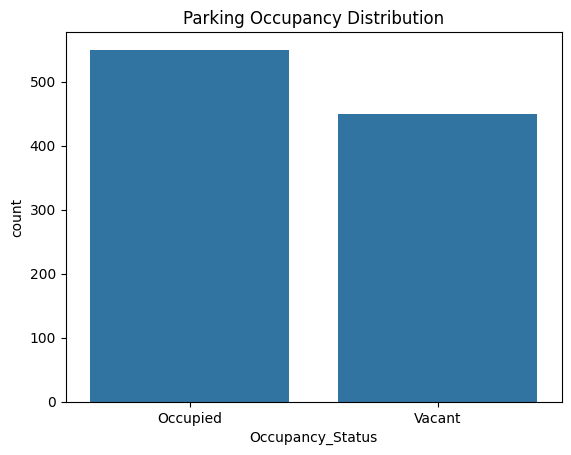

In [8]:
sns.countplot(x="Occupancy_Status", data=df)
plt.title("Parking Occupancy Distribution")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5188\1667817071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Occupancy_Status", palette='viridis')


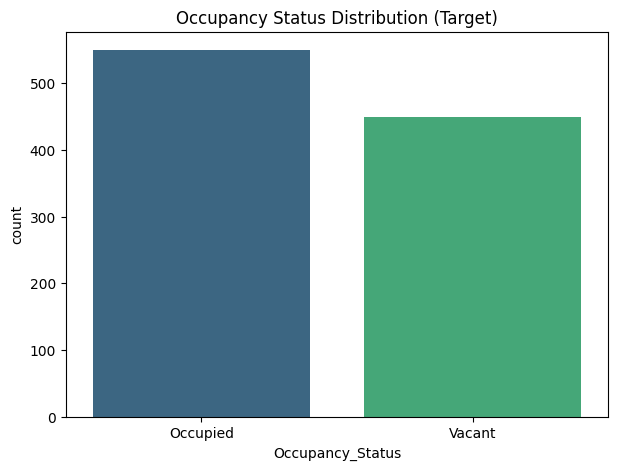

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Occupancy_Status", palette='viridis')
plt.title('Occupancy Status Distribution (Target)')
plt.show()


In [13]:
target_column = 'Occupancy_Status'

C:\Users\HP\AppData\Local\Temp\ipykernel_5188\852598123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_column, y='Sensor_Reading_Ultrasonic', ax=axes[0], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_5188\852598123.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_column, y='Sensor_Reading_Pressure', ax=axes[1], palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_5188\852598123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_column, y='Sensor_Reading_Proximity',

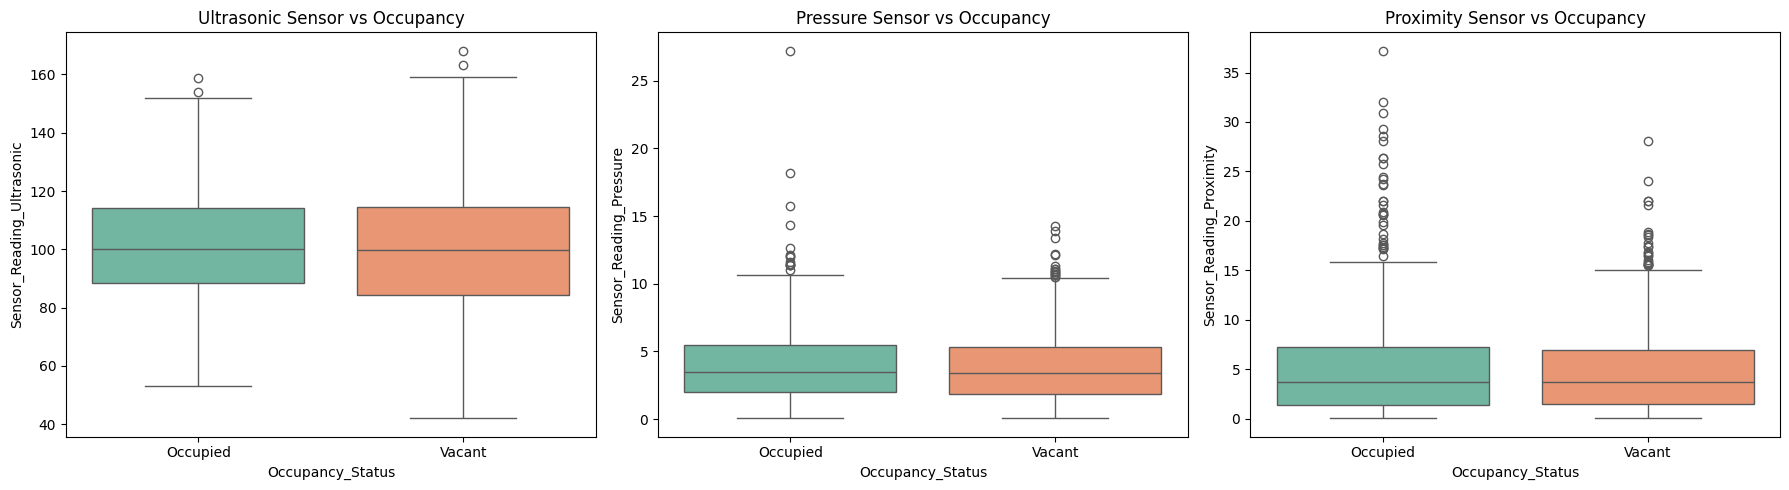

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x=target_column, y='Sensor_Reading_Ultrasonic', ax=axes[0], palette='Set2')
axes[0].set_title('Ultrasonic Sensor vs Occupancy')

sns.boxplot(data=df, x=target_column, y='Sensor_Reading_Pressure', ax=axes[1], palette='Set2')
axes[1].set_title('Pressure Sensor vs Occupancy')

sns.boxplot(data=df, x=target_column, y='Sensor_Reading_Proximity', ax=axes[2], palette='Set2')
axes[2].set_title('Proximity Sensor vs Occupancy')
plt.tight_layout()
plt.show()

In [15]:
cols_to_clean = ['Sensor_Reading_Proximity', 'Sensor_Reading_Pressure', 
                 'Vehicle_Type_Weight', 'Vehicle_Type_Height', 
                 'Weather_Temperature', 'Occupancy_Rate', 'Payment_Amount',
                 'Sensor_Reading_Ultrasonic', 'Environmental_Noise_Level', 
                 'Proximity_To_Exit']

Q1 = df[cols_to_clean].quantile(0.25)
Q3 = df[cols_to_clean].quantile(0.75)
IQR = Q3 - Q1

In [16]:
df_cleaned = df[~((df[cols_to_clean] < (Q1 - 1.5 * IQR)) | (df[cols_to_clean] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original Data Size: {len(df)}")
print(f"Cleaned Data Size: {len(df_cleaned)}")

Original Data Size: 1000
Cleaned Data Size: 785


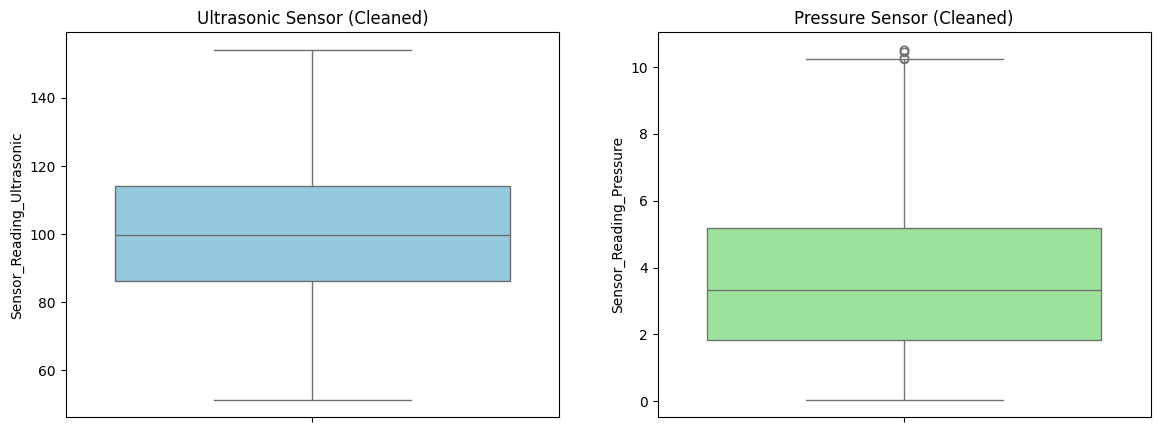

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df_cleaned, y='Sensor_Reading_Ultrasonic', ax=axes[0], color='skyblue')
axes[0].set_title('Ultrasonic Sensor (Cleaned)')

sns.boxplot(data=df_cleaned, y='Sensor_Reading_Pressure', ax=axes[1], color='lightgreen')
axes[1].set_title('Pressure Sensor (Cleaned)')
plt.show()

<Figure size 1000x600 with 0 Axes>

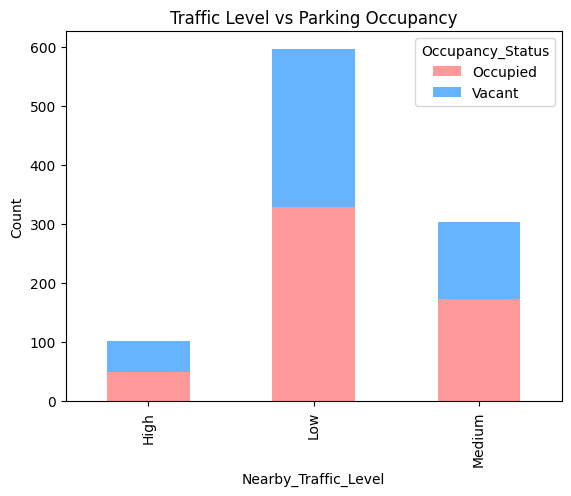

In [18]:
plt.figure(figsize=(10, 6))
weather_pivot = pd.crosstab(df['Nearby_Traffic_Level'], df[target_column])
weather_pivot.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Traffic Level vs Parking Occupancy')
plt.ylabel('Count')
plt.show()

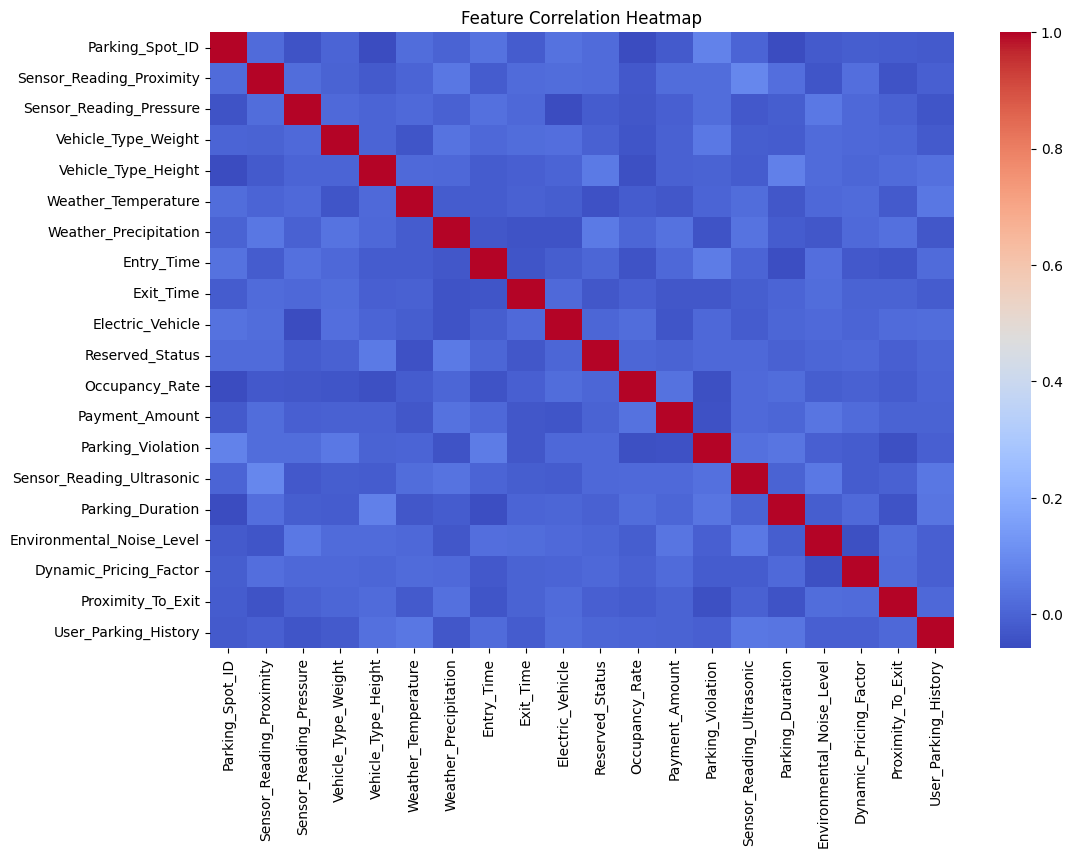

In [19]:
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()